In [111]:
import numpy as np 
#aqui estoy importando la libreria de numpy
import pandas as pd
#aqui estoy importando la libreria de pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df= pd.DataFrame(np.load("proyecto_training_data.npy"),columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
#creo la variable df para poder verla luego, esta variale incluye lo siguiente
#llama un Dataframe con panda, con los datos del proyecto_training_data que se carga con numpy, adentro del dataframe coloco una coma y pongo columns 
#para darle nombre a las columnas 
print(df)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]


In [113]:
filas , columnas = df.shape
print(filas) #tomar en cuenta el index empieza en 0 por eso marca 1459, en vez de 1460
print(columnas)

1460
6


In [114]:
#usare shuffle para poder colocar los datos de forma aleatoria
np.random.shuffle(df.values)
#voy a separar los datos en 80% de entrenamiento y el 20% de validacion
Cantidad_filas_Entrenamiento =int(0.8*len(df))
#necesito hacer dos subconjuntos, usare iloc
set_Entrenamiento = df.iloc[:Cantidad_filas_Entrenamiento]
set_validacion = df.iloc[Cantidad_filas_Entrenamiento:]

print(set_Entrenamiento)
print('--------')
print(set_validacion)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      165500.0          5.0    1110.0           4.0     1978.0          NaN
1      185000.0          6.0     680.0           6.0     1993.0          NaN
2      106000.0          5.0    1075.0          11.0     1898.0         90.0
3      178400.0          7.0     999.0           6.0     1961.0          NaN
4      424870.0          8.0    1466.0          11.0     2006.0         77.0
...         ...          ...       ...           ...        ...          ...
1163   115000.0          5.0    1771.0           9.0     1960.0        100.0
1164   135500.0          5.0     980.0           6.0     1967.0         75.0
1165   128000.0          6.0     958.0           5.0     1976.0          NaN
1166   189000.0          6.0    1055.0           8.0     1992.0         70.0
1167   159000.0          6.0    1004.0           7.0     1947.0         50.0

[1168 rows x 6 columns]
--------
      SalePrice  OverallQual  1stFlrSF  To

In [115]:
def getDFDataTypes(df):
    continuas = []
    discretas  = []
    categoricas = [] 
    for col in df.columns.values:
        if((df[col].dtype == 'int64') or (df[col].dtype == 'float64')):
            cantidad = len(df[col].value_counts())
            if(cantidad >= 30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas
continuas, discretas, categoricas = getDFDataTypes(df)
print('continuas:',continuas)
print('discretas:',discretas)
print('categoricas:',categoricas)

continuas: ['SalePrice', '1stFlrSF', 'YearBuilt', 'LotFrontage']
discretas: ['OverallQual', 'TotRmsAbvGrd']
categoricas: []


### Analisis Exploratorio de datos para cada variable.

In [116]:
#sacando datos para la primera variable, 
col1 = set_Entrenamiento.to_numpy()[:,0]
Sale_Price_media = np.round((np.mean(col1)),2)
Sale_Price_Max = np.max(col1)
Sale_Price_Min = np.min(col1)
Sale_Price_Rango = np.ptp(col1)
Sale_Price_Desves = np.round((np.std(col1)),2)
Exploracion_Precio = [Sale_Price_media,Sale_Price_Max,Sale_Price_Min,Sale_Price_Rango,Sale_Price_Desves]
Exploracion_Precio

[180006.88, 755000.0, 34900.0, 720100.0, 80182.66]

In [117]:
#Exploracion segunda variable, 
col2 = set_Entrenamiento.to_numpy()[:,1]
Overall_media = np.round((np.mean(col2)),2)
Overall_Max = np.max(col2)
Overall_Min = np.min(col2)
Overall_Rango = np.ptp(col2)
Overall_Desves = np.round((np.std(col2)),2)
Exploracion_Overall = [Overall_media,Overall_Max,Overall_Min,Overall_Rango,Overall_Desves]



In [118]:
#Exploracion tercera variable, 
col3 = set_Entrenamiento.to_numpy()[:,2]
firstfloor_media = np.round((np.mean(col3)),2)
firstfloor_Max = np.max(col3)
firstfloor_Min = np.min(col3)
firstfloor_Rango = np.ptp(col3)
firstfloor_Desves = np.round((np.std(col3)),2)
Exploracion_firstfloor = [firstfloor_media,firstfloor_Max,firstfloor_Min,firstfloor_Rango,firstfloor_Desves]

In [119]:
#Exploracion cuarta variable, 
col4 = set_Entrenamiento.to_numpy()[:,3]
Rooms_media = np.round((np.mean(col4)),2)
Rooms_Max = np.max(col4)
Rooms_Min = np.min(col4)
Rooms_Rango = np.ptp(col4)
Rooms_Desves = np.round((np.std(col4)),2)
Exploracion_Rooms = [Rooms_media,Rooms_Max,Rooms_Min,Rooms_Rango,Rooms_Desves]

In [120]:
#Exploracion quinta variable, 
col5 = set_Entrenamiento.to_numpy()[:,4]
Year_media = np.round((np.mean(col5)),2)
Year_Max = np.max(col5)
Year_Min = np.min(col5)
Year_Rango = np.ptp(col5)
Year_Desves = np.round((np.std(col5)),2)
Exploracion_Year = [Year_media,Year_Max,Year_Min,Year_Rango,Year_Desves]

In [121]:
#Exploracion sexta variable, 
col6 = set_Entrenamiento.to_numpy()[:,5]
Frontage_media = np.round((np.nanmean(col6)),2)
Frontage_Max = np.nanmax(col6)
Frontage_Min = np.nanmin(col6)
Frontage_Rango = Frontage_Max-Frontage_Min #realice la resta ya que ptp no acepta datos nan
Frontage_Desves = np.round((np.nanstd(col6)),2)
Frontage_Overall = [Frontage_media,Frontage_Max,Frontage_Min,Frontage_Rango,Frontage_Desves]

In [122]:
#haciendo una tabla con los datos
Dato_Estadistico = ['Sales Price','Overall Quall','First Floor','Rooms','Year Build','Frontage']
Media = [Sale_Price_media,Overall_media,firstfloor_media,Rooms_media,Year_media,Frontage_media]
Maximo = [Sale_Price_Max,Overall_Max,firstfloor_Max,Rooms_Max,Year_Max,Frontage_Max]
Minimo = [Sale_Price_Min,Overall_Min,firstfloor_Min,Rooms_Min,Year_Min,Frontage_Min]
Rango = [Sale_Price_Rango,Overall_Rango,firstfloor_Rango,Rooms_Rango,Year_Rango,Frontage_Rango]
Desviacion = [Sale_Price_Desves,Overall_Desves,firstfloor_Desves,Rooms_Desves,Year_Desves,Frontage_Desves]


In [123]:
Tabla_Exploracion = { 'Datos': Dato_Estadistico,
         'Medias': pd.Series( Media),
         'Maximos': pd.Series(Maximo),
         'Minimos':pd.Series(Minimo),
         'Rango':pd.Series(Rango),
         'Desviacion Estandar':pd.Series(Desviacion),
     }
df1 = pd.DataFrame(Tabla_Exploracion)
df1

,Datos,Medias,Maximos,Minimos,Rango,Desviacion Estandar
0,Sales Price,180006.88,755000.0,34900.0,720100.0,80182.66
1,Overall Quall,6.09,10.0,1.0,9.0,1.40
2,First Floor,1159.14,4692.0,334.0,4358.0,385.95
3,Rooms,6.51,12.0,2.0,10.0,1.61
4,Year Build,1971.18,2010.0,1872.0,138.0,30.58
5,Frontage,70.08,313.0,21.0,292.0,24.35


### 4. Histograma  para cada variable  del Dataset

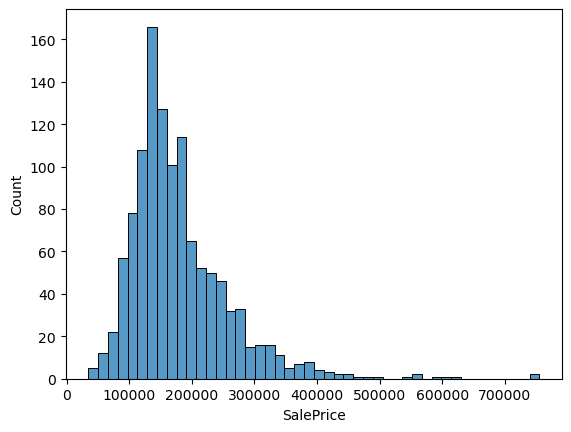

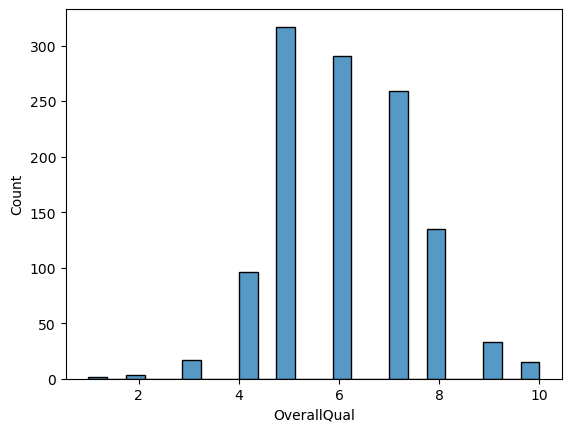

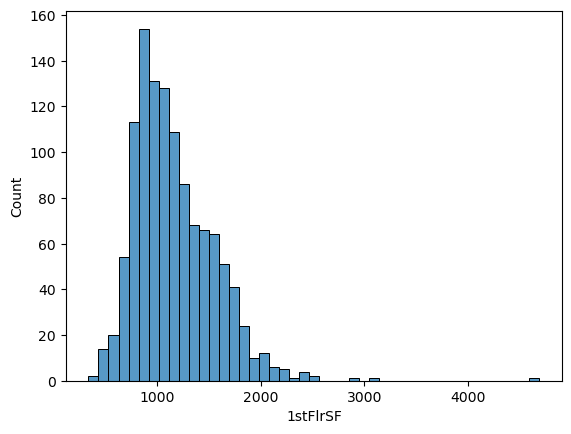

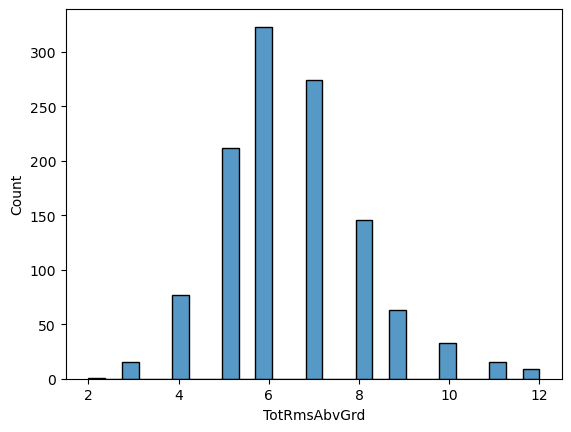

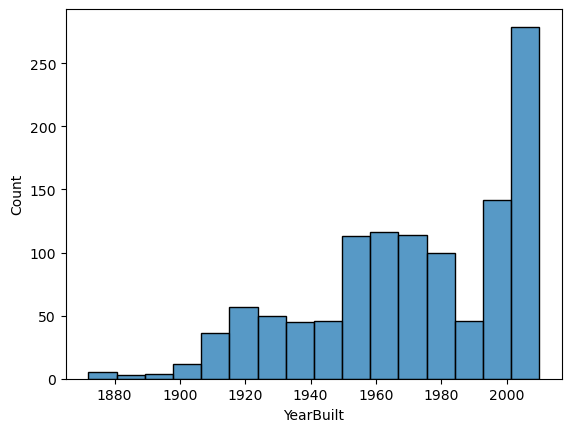

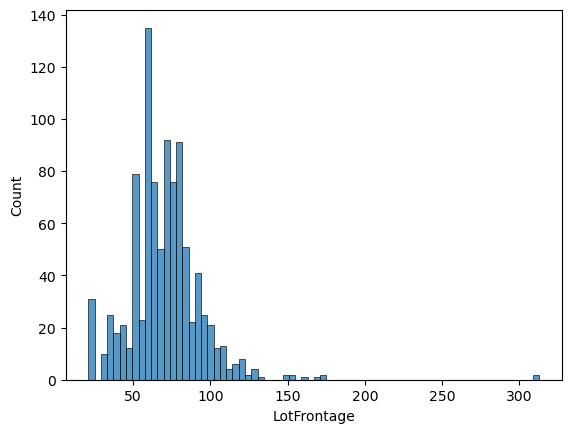

In [124]:
for variables in set_Entrenamiento.columns:
    sns.histplot(set_Entrenamiento[variables].dropna())
    #use Histplot ya que el programa me mostraba un mensaje que distplot dejaria de utilizarse
    #por lo cual pedia cambiar a histplot o displot 
    plt.show()


### 5. Para cada variable independiente X calcular"

#### Coeficiente de correlacion entre x y y 

In [125]:
#Coeficiente de correlacion con primera variable 
print(set_Entrenamiento.columns)
correlacion1 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["OverallQual"])
correlacion2 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["1stFlrSF"])
correlacion3 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["TotRmsAbvGrd"])
correlacion4 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["YearBuilt"])
correlacion5 = set_Entrenamiento["SalePrice"].corr(set_Entrenamiento["LotFrontage"])

Tabla_Correlaciones = { 'Variable': ("OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"),
         'Correlacion': (correlacion1,correlacion2,correlacion3,correlacion4,correlacion5),
     }
df2 = pd.DataFrame(Tabla_Correlaciones)
df2


Index(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt',
       'LotFrontage'],
      dtype='object')


,Variable,Correlacion
0,OverallQual,0.789833
1,1stFlrSF,0.588126
2,TotRmsAbvGrd,0.534665
3,YearBuilt,0.537547
4,LotFrontage,0.352525


#### Graficos para cada relacion

Text(0.5, 1.0, 'Sale_Price vs LotFrontage con una Correlacion de:0.3525247081232793')

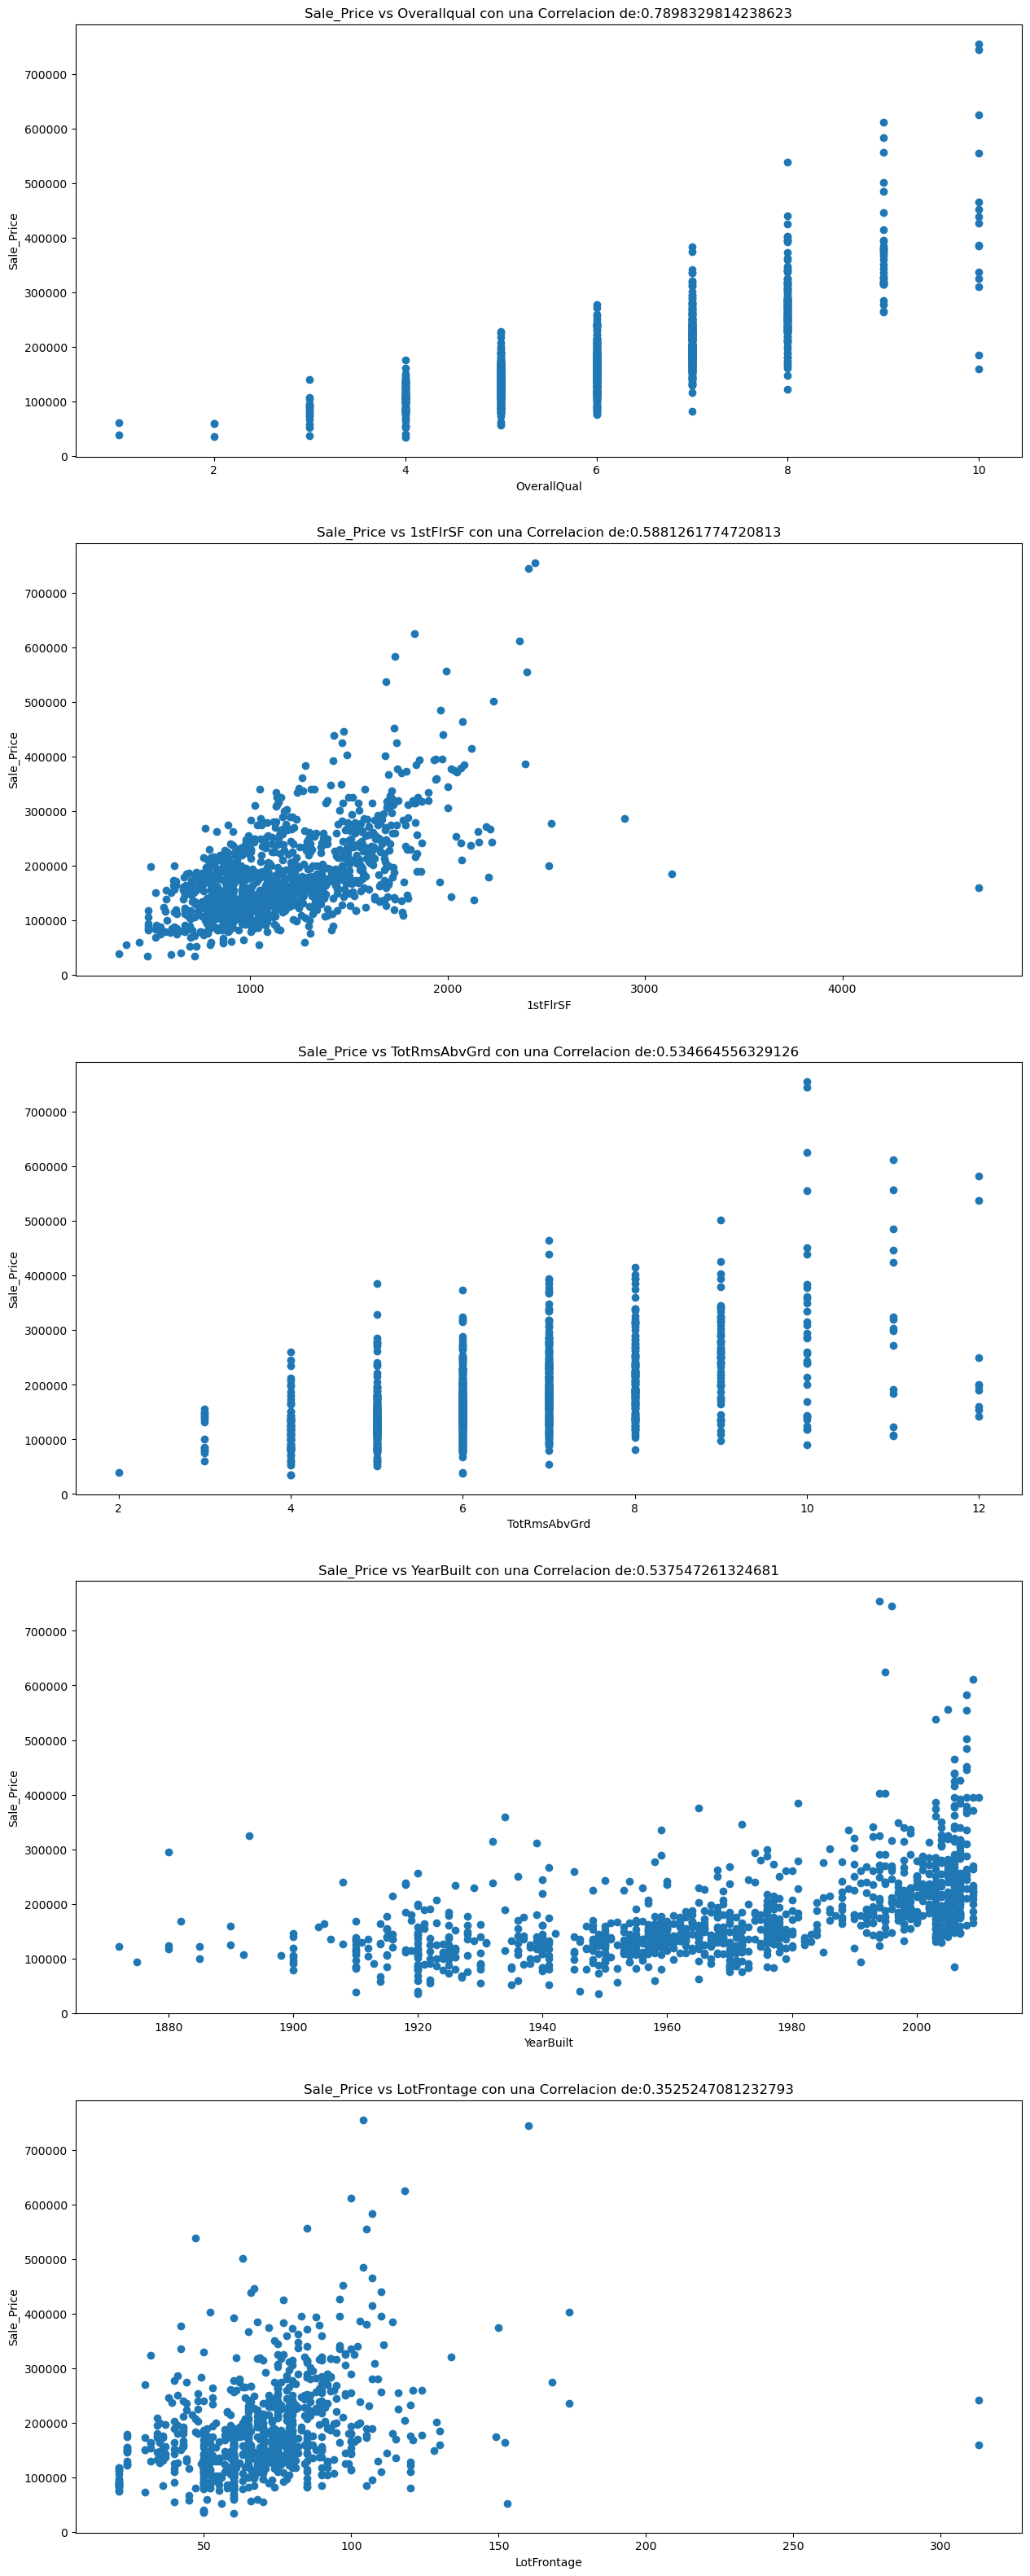

In [126]:
#al intentar hacerlo en una grafica se superponen los datos por lo cual 
#voy a usar subplots 

fig, sca =plt.subplots(5,1, figsize =(15,40))
sca[0].scatter(set_Entrenamiento["OverallQual"],set_Entrenamiento["SalePrice"])
sca[1].scatter(set_Entrenamiento["1stFlrSF"],set_Entrenamiento["SalePrice"])
sca[2].scatter(set_Entrenamiento["TotRmsAbvGrd"],set_Entrenamiento["SalePrice"])
sca[3].scatter(set_Entrenamiento["YearBuilt"],set_Entrenamiento["SalePrice"])
sca[4].scatter(set_Entrenamiento["LotFrontage"],set_Entrenamiento["SalePrice"])
#PARA PODER COLOCAR TITULO Y EJES:
sca[0].set_xlabel('OverallQual')
sca[0].set_ylabel('Sale_Price')
sca[0].set_title('Sale_Price vs Overallqual con una Correlacion de:'+ str(correlacion1))

sca[1].set_xlabel('1stFlrSF')
sca[1].set_ylabel('Sale_Price')
sca[1].set_title('Sale_Price vs 1stFlrSF con una Correlacion de:'+ str(correlacion2))

sca[2].set_xlabel('TotRmsAbvGrd')
sca[2].set_ylabel('Sale_Price')
sca[2].set_title('Sale_Price vs TotRmsAbvGrd con una Correlacion de:' +str(correlacion3))

sca[3].set_xlabel('YearBuilt')
sca[3].set_ylabel('Sale_Price')
sca[3].set_title('Sale_Price vs YearBuilt con una Correlacion de:' +str(correlacion4))

sca[4].set_xlabel('LotFrontage')
sca[4].set_ylabel('Sale_Price')
sca[4].set_title('Sale_Price vs LotFrontage con una Correlacion de:' +str(correlacion5)) #los concateno ya que el set_title solo admite candea y por eso paso correlacion a str

### escogiendo variables
#### las variables elegidas para el analisis son overallQual y 1stflrsf

In [127]:
#haciendo diccionario de correlaciones
correlaciones_dic = {"OverallQuall": correlacion1, "1stFlrSF": correlacion2, "TotRmsAbvGrd": correlacion3, "YearBuilt": correlacion4, "LotFrontage": correlacion5}
# Ordenamos los elementos del diccionario según sus valores en orden descendente
correlaciones_dic_ordenada = sorted(correlaciones_dic.items(), key=lambda x: x[1], reverse=True)
# Tomamos los dos últimos elementos de la lista, que son los dos valores más grandes
variable1, valor1 = correlaciones_dic_ordenada[0]
variable2, valor2 = correlaciones_dic_ordenada[1]
print(variable1, valor1) 
print(variable2, valor2)  

OverallQuall 0.7898329814238623
1stFlrSF 0.5881261774720813


## 6. Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗x.


In [137]:
def regresion_lineal (x,y,epoch,imprimir_error,alpha):
    modelos = []
    errores = []
    n = len(x)
    x = np.array([x,np.ones(len(x))])
    betas = np.array([0,0])

    for i in range(epoch):
        y_calcu = np.dot(betas,x)
        error = ((1 / (2 * n)) * np.sum(np.square(y - y_calcu)))
        errores.append(error)
        modelos.append({ i : betas})
        betagrad = (1 / n ) * np.dot((y_calcu - y), x.T)
        betas = betas - (alpha * betagrad)
        if (i % imprimir_error == 0):
            print(f'Epoch: {i}, Error: {error}')

    return modelos, errores


In [138]:
def display_error (errores2):
    plt.clf()
    plt.plot(errores2)
    plt.xlabel('Iteraciones')
    plt.ylabel('Errores')
    plt.title('Errores vs iteraciones')  
    plt.show() 

In [151]:
def recta_data (modelos,n,x,y):
    n_modelos = modelos[::n]
    betas_modelos = [list(d.values())[0] for d in n_modelos]
    plt.figure()
    plt.scatter(x,y)
    plt.xlabel('variable independiente')
    plt.ylabel('SalePrice')
    plt.title('independiente vs salePrice') 
    for modelo in betas_modelos:
        x_vals = np.linspace(min(x),max(x),1000)
        y_vals = modelo[0] * x_vals + modelo[1]
        plt.plot(x_vals, y_vals)
    plt.show()

## Entrenando modelo utilizando la variable OverallQual

Epoch: 0, Error: 19415867243.351456
Epoch: 10, Error: 18032930605.079144
Epoch: 20, Error: 16756519963.630032
Epoch: 30, Error: 15578429599.174845
Epoch: 40, Error: 14491085880.214348
Epoch: 50, Error: 13487498573.681923
Epoch: 60, Error: 12561215905.639156
Epoch: 70, Error: 11706283083.655596
Epoch: 80, Error: 10917204014.218288
Epoch: 90, Error: 10188905969.057388
Epoch: 100, Error: 9516706973.232138
Epoch: 110, Error: 8896285705.31945
Epoch: 120, Error: 8323653716.197366
Epoch: 130, Error: 7795129787.821425
Epoch: 140, Error: 7307316267.149957
Epoch: 150, Error: 6857077223.072046
Epoch: 160, Error: 6441518285.912015
Epoch: 170, Error: 6057968039.901057
Epoch: 180, Error: 5703960848.990761
Epoch: 190, Error: 5377221005.597817
Epoch: 200, Error: 5075648100.374275
Epoch: 210, Error: 4797303518.947478
Epoch: 220, Error: 4540397978.818971
Epoch: 230, Error: 4303280026.298725
Epoch: 240, Error: 4084425419.5229316
Epoch: 250, Error: 3882427329.3001914
Epoch: 260, Error: 3695987294.788572
E

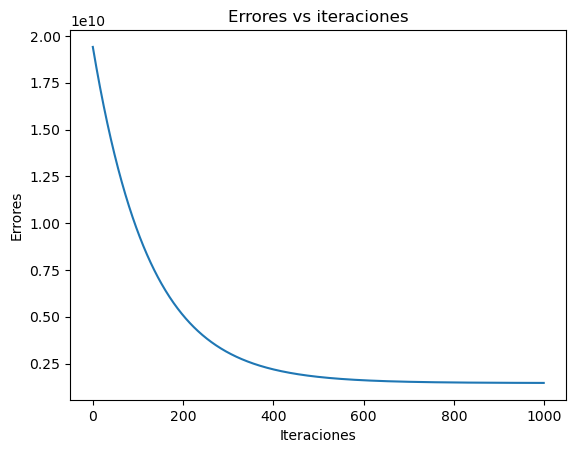

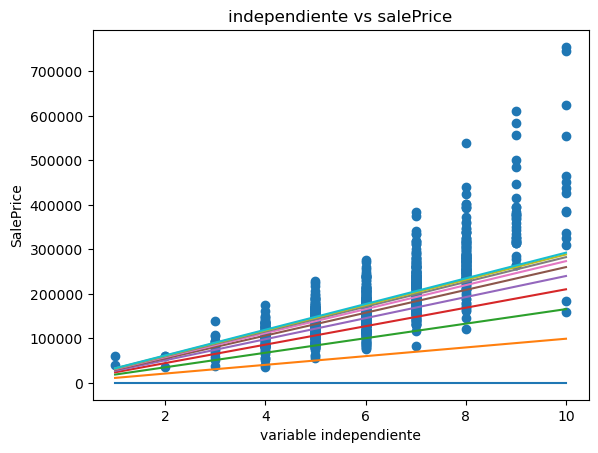

In [152]:
modelos, errores = regresion_lineal(set_Entrenamiento['OverallQual'],set_Entrenamiento['SalePrice'], 1000, 10, 0.0001)
display_error(errores)
recta_data(modelos,100,set_Entrenamiento['OverallQual'],set_Entrenamiento['SalePrice'])

## Entrenamiento para la variable independiente 1stFlrSF

Epoch: 0, Error: 19415867243.351456
Epoch: 10, Error: 2856183313.6326594
Epoch: 20, Error: 2203015342.8039784
Epoch: 30, Error: 2177252253.1208982
Epoch: 40, Error: 2176236058.7292013
Epoch: 50, Error: 2176195962.6194396
Epoch: 60, Error: 2176194367.01024
Epoch: 70, Error: 2176194289.9863853
Epoch: 80, Error: 2176194272.8604937
Epoch: 90, Error: 2176194258.0971756


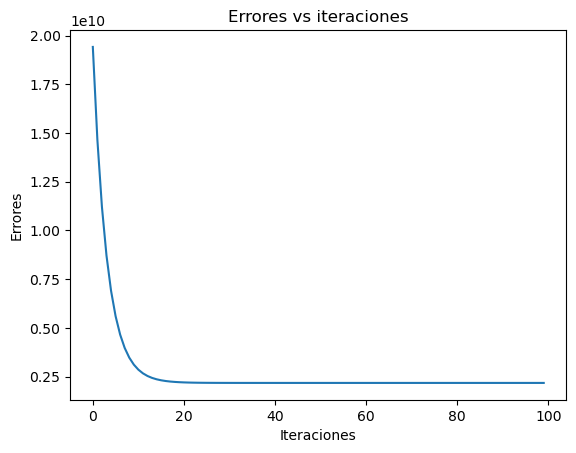

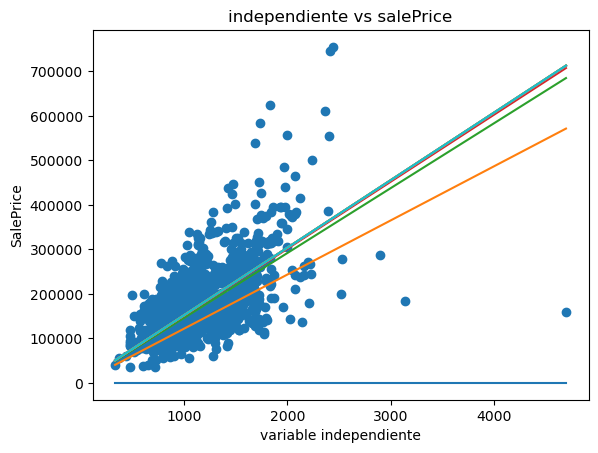

In [169]:
modelos, errores = regresion_lineal(set_Entrenamiento['1stFlrSF'],set_Entrenamiento['SalePrice'], 100, 10, 0.0000001)
display_error(errores)
recta_data(modelos,10,set_Entrenamiento['1stFlrSF'],set_Entrenamiento['SalePrice'])

### instalando scikit-learn

In [ ]:
!pip install -U scikit-learn

In [173]:
import sklearn.linear_model as sklm

In [176]:
#set_Entrenamiento['1stFlrSF']
#set_Entrenamiento['OverallQual']
print(set_Entrenamiento['SalePrice'].shape)
print(set_Entrenamiento['1stFlrSF'])

(1168,)
0       1110.0
1        680.0
2       1075.0
3        999.0
4       1466.0
         ...  
1163    1771.0
1164     980.0
1165     958.0
1166    1055.0
1167    1004.0
Name: 1stFlrSF, Length: 1168, dtype: float64


In [186]:
regresionx1 = sklm.LinearRegression(fit_intercept = True).fit(set_Entrenamiento['1stFlrSF'].values.reshape(-1,1), set_Entrenamiento['SalePrice'].values)
regresionx1.coef_


array([122.1871314])

In [187]:
regresionx1 = sklm.LinearRegression(fit_intercept = True).fit(set_Entrenamiento['OverallQual'].values.reshape(-1,1), set_Entrenamiento['SalePrice'].values)
regresionx1.coef_

array([45344.44164173])